In [90]:
from pyspark.sql import SparkSession
from pyspark import SparkFiles
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('drive')

import pycurl
import certifi
from io import BytesIO
import json
import requests


#SuperJob Parser

In [ ]:
import pandas as pd

def parse_superjob(city,Area,education,remote,experience,fulltime,pay,n):


  if city == "Moscow":
    city1 = "https://www.superjob.ru"
  if city == "SPB":
    city1 = "https://spb.superjob.ru"
  if city == "Krasnogorsk":
    city1 = "https://krasnogorsk.superjob.ru"

  if Area == "It":
    Area1 = "&catalogues%5B0%5D=33"
  if Area == "Industry":
    Area1 = "&catalogues%5B0%5D=327"
  if Area == "Sales":
    Area1 = "&catalogues%5B0%5D=438"

  if education == True:
    education1 = "without_higher_education=0&"
  else:
    education1 = "without_higher_education=1&"


  if remote == True:
    remote1 = "remote_work_binary=2&"
  else:
    remote1 = "remote_work_binary=0&"


  if experience == True:
    experience1 = "without_experience=0&"
  else:
    experience1 = "without_experience=1&"


  if fulltime == True:
    fulltime1 = "wwork_type%5B0%5D=6&"
  else:
    fulltime1 = "wwork_type%5B0%5D=10&"





  res_name = []
  res_city = []
  res_Area = []
  res_education = []
  res_remote = []
  res_experience = []
  res_fulltime = []
  res_pay = []


  for p in pay:
    for i in range(n):
      p = str(p)
      #TARGET_URL = city1 + "/vacancy/search/" + "?payment_value=" + p + "&" + remote1 + education1 + experience1 + fulltime1 + Area1 + "&geo%5Bt%5D%5B0%5D=4" + "&page=" + str(i)

      #buffer = BytesIO()
      #curl = pycurl.Curl()
      #curl.setopt(curl.URL, TARGET_URL)
      #curl.setopt(curl.WRITEDATA, buffer)

      #curl.setopt(curl.CAINFO, certifi.where())
      #curl.perform()
      #curl.close()

      # Using BytesIO to retrieve the scraped data
      #body = buffer.getvalue()

      # Saving the output and printing it in terminal
      #data = body.decode('utf-8')
      url =  city1 + "/vacancy/search/" + "?payment_value=" + p + "&" + remote1 + education1 + experience1 + fulltime1 + Area1 + "&geo%5Bt%5D%5B0%5D=4" + "&page=" + str(i)
      print(url)
      data= requests.get(url).text
      dd = data.split("f-test-search-result-item")
      for d in dd:
        c = d.split('/vakansii/')
        if len(c) > 1:
          g = c[1].split(".html")
          name = g[0]
          if ("katalog" in name) == False:
            res_name.append(name)
            res_city.append(city)
            res_Area.append(Area)
            res_education.append(education)
            res_remote.append(remote)
            res_experience.append(experience)
            res_fulltime.append(fulltime)
            res_pay.append(p)



  res_site = []
  for i in range(len(res_name)):
    res_site.append("superjob")
  d = { "Site":res_site ,  "Name":res_name ,"city":res_city ,"Area": res_Area,"education":res_education,"remote":res_remote,"experience":res_experience,"fulltime":res_fulltime ,"Payment":res_pay}
  data = pd.DataFrame(data = d)

  return data

#HeadHunter Parser

In [ ]:
def parse_hh(city,Area,education,remote,experience,fulltime,pay,n):


  if city == "Moscow":
    city1 = "area=1"
  if city == "SPB":
    city1 = "area=2034&area=5792&area=4912&area=1&area=2&"
  if city == "Krasnogorsk":
    city1 = "area=2&area=2034"

  if Area == "It":
    Area1 = "industry=388.50"
  if Area == "Industry":
    Area1 = "&industry=388.508&industry=33"
  if Area == "Sales":
    Area1 = "industry=11"

  if education == True:
    education1 = "education=higher"
  else:
    education1 = "education=not_required_or_not_specified"


  if remote == True:
    remote1 = "remote_work_binary=2&"
  else:
    remote1 = "remote_work_binary=0&"


  if experience == True:
    experience1 = "without_experience=0&"
  else:
    experience1 = "without_experience=1&"


  if fulltime == True:
    fulltime1 = "wwork_type%5B0%5D=6&"
  else:
    fulltime1 = "wwork_type%5B0%5D=10&"





  res_name = []
  res_city = []
  res_Area = []
  res_education = []
  res_remote = []
  res_experience = []
  res_fulltime = []
  res_pay = []


  for p in pay:
    for i in range(n):
      p = str(p)
      TARGET_URL = "https://hh.ru/search/vacancy?ored_clusters=true&order_by=publication_time&enable_snippets=true&hhtmFrom=vacancy_search_list&hhtmFromLabel=vacancy_search_line&L_save_area=true&employment_form=FULL&excluded_text=%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B3%D0%BE%D1%80%D1%81%D0%BA&experience=between3And6&education=higher&search_field=name&search_field=company_name&search_field=description&work_format=ON_SITE&text="

      buffer = BytesIO()
      curl = pycurl.Curl()
      curl.setopt(curl.URL, TARGET_URL)
      curl.setopt(curl.WRITEDATA, buffer)

      curl.setopt(curl.CAINFO, certifi.where())
      curl.perform()
      curl.close()

      # Using BytesIO to retrieve the scraped data
      body = buffer.getvalue()

      # Saving the output and printing it in terminal
      #data = body.decode('utf-8')
      #rl =  city1 + "/vacancy/search/" + "?payment_value=" + p + "&" + remote1 + education1 + experience1 + fulltime1 + Area1 + "&geo%5Bt%5D%5B0%5D=4" + "&page=" + str(i)
      #print(url)
      #data= requests.get(url).text
      #dd = data.split("f-test-search-result-item")
      for d in dd:
        c = d.split('/vakansii/')
        if len(c) > 1:
          g = c[1].split(".html")
          name = g[0]
          if ("katalog" in name) == False:
            res_name.append(name)
            res_city.append(city)
            res_Area.append(Area)
            res_education.append(education)
            res_remote.append(remote)
            res_experience.append(experience)
            res_fulltime.append(fulltime)
            res_pay.append(p)



  res_site = []
  for i in range(len(res_name)):
    res_site.append("superjob")
  d = { "Site":res_site ,  "Name":res_name ,"city":res_city ,"Area": res_Area,"education":res_education,"remote":res_remote,"experience":res_experience,"fulltime":res_fulltime ,"Payment":res_pay}
  data = pd.DataFrame(data = d)

  return data

In [ ]:
pay = [1000,
50000,
100000,
200000,
300000]

data1 = parse_hh("Krasnogorsk","Sales",False,False,False,False,pay, 10)

In [ ]:
data11 = data1.drop_duplicates().reset_index()
data11

In [ ]:
data = data11[~((data11.duplicated(['Name'], keep=False))&(data11["Payment"]=="1000"))]
data = data[~((data.duplicated(['Name'], keep=False))&(data["Payment"]=="50000"))]
data = data[~((data.duplicated(['Name'], keep=False))&(data["Payment"]=="100000"))]
data = data[~((data.duplicated(['Name'], keep=False))&(data["Payment"]=="200000"))]
data

In [ ]:
datasp.drop(columns='level_0', inplace=True)
datasp.drop(columns='Unnamed: 0', inplace=True)
datasp.drop(columns='index', inplace=True)
datasp

In [94]:
data=pd.read_csv('drive/My Drive/data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data

,Site,Name,city,Area,education,remote,experience,fulltime,Payment
0,HeadHunter,glavnyj-specialist-ekspert-klientskoj-sluzhby-...,Krasnogorsk,Sales,True,False,True,True,1000
1,HeadHunter,kassir-50683519,Krasnogorsk,Sales,True,False,True,True,50000
2,HeadHunter,kassir-torgovogo-zala-50685067,Krasnogorsk,Sales,True,False,True,True,1000
3,HeadHunter,konsultant-call-centra-50598031,Krasnogorsk,Sales,True,False,True,True,1000
4,HeadHunter,nochnoj-administrator-magazina-50676395,Krasnogorsk,Sales,True,False,True,True,50000
...,...,...,...,...,...,...,...,...,...
3710,superjob,specialist-podderzhki-klientov-50646698,Moscow,It,False,False,False,True,50000
3711,superjob,specialist-podderzhki-sotrudnikov-49892129,Moscow,It,False,False,False,True,50000
3712,superjob,specialist-tehnicheskoj-podderzhki-48558891,Moscow,It,False,False,False,True,50000
3713,superjob,specialist-tehnicheskoj-podderzhki-usit-50225285,Moscow,It,False,False,False,True,50000


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('drive')



Mounted at drive


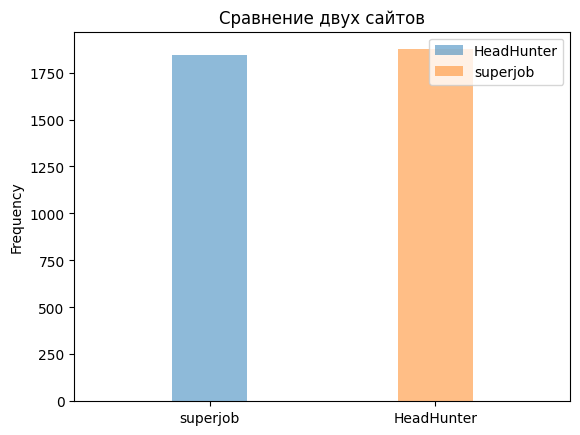

In [131]:
dsp = data.loc[lambda data: data['Site'] ==	"HeadHunter"]
dhh = data.loc[lambda data: data['Site'] =="superjob"]
plt.hist(dhh['Site'], bins=3, alpha=0.5, label='HeadHunter')
plt.hist(dsp['Site'], bins=3, alpha=0.5, label='superjob')
plt.legend(loc='upper right')
plt.title('Сравнение двух сайтов')

plt.ylabel("Frequency")
plt.show()


<Axes: ylabel='Frequency'>

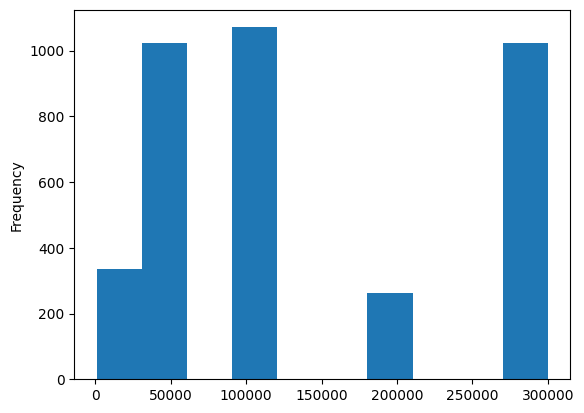

In [134]:
data['Payment'].plot(kind='hist')

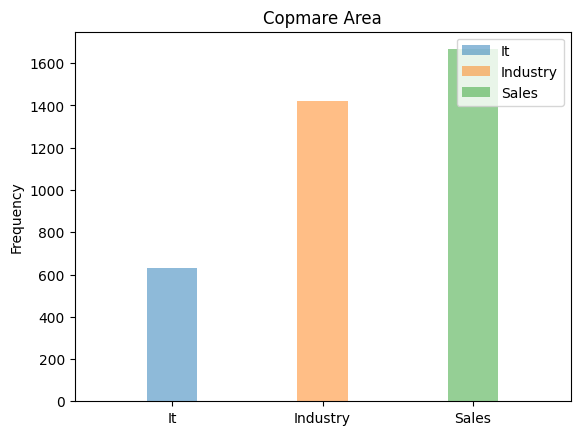

In [132]:
it = data.loc[lambda data: data['Area'] ==	"It"]
ind = data.loc[lambda data: data['Area'] =="Industry"]
sal = data.loc[lambda data: data['Area'] =="Sales"]
plt.hist(it['Area'], bins=3, alpha=0.5, label="It")
plt.hist(ind['Area'], bins=3, alpha=0.5, label="Industry")
plt.hist(sal['Area'], bins=3, alpha=0.5, label="Sales")
plt.legend(loc='upper right')
plt.title('Copmare Area')

plt.ylabel('Frequency')
plt.show()


In [130]:
data

,Site,Name,city,Area,education,remote,experience,fulltime,Payment
0,HeadHunter,glavnyj-specialist-ekspert-klientskoj-sluzhby-...,Krasnogorsk,Sales,True,False,True,True,1000
1,HeadHunter,kassir-50683519,Krasnogorsk,Sales,True,False,True,True,50000
2,HeadHunter,kassir-torgovogo-zala-50685067,Krasnogorsk,Sales,True,False,True,True,1000
3,HeadHunter,konsultant-call-centra-50598031,Krasnogorsk,Sales,True,False,True,True,1000
4,HeadHunter,nochnoj-administrator-magazina-50676395,Krasnogorsk,Sales,True,False,True,True,50000
...,...,...,...,...,...,...,...,...,...
3710,superjob,specialist-podderzhki-klientov-50646698,Moscow,It,False,False,False,True,50000
3711,superjob,specialist-podderzhki-sotrudnikov-49892129,Moscow,It,False,False,False,True,50000
3712,superjob,specialist-tehnicheskoj-podderzhki-48558891,Moscow,It,False,False,False,True,50000
3713,superjob,specialist-tehnicheskoj-podderzhki-usit-50225285,Moscow,It,False,False,False,True,50000


#Connected to Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3/"

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('abc').master("local[*]").getOrCreate()
spark

#Transform all data Features in Int


In [41]:
n_a = []
for i in data["Area"]:
  if i == "It":
    n_a.append(1)
  if i == "Industry":
    n_a.append(2)
  if i == "Sales":
    n_a.append(3)

In [42]:
n_c = []
for i in data["city"]:
  if i == "Moscow":
    n_c.append(1)
  if i == "SPB":
    n_c.append(2)
  if i == "Krasnogorsk":
    n_c.append(3)

In [43]:
n_ed = []
for i in data["education"]:
  if i == True:
    n_ed.append(1)
  if i == False:
    n_ed.append(2)


In [44]:
n_ex = []
for i in data["experience"]:
  if i == True:
    n_ex.append(1)
  if i == False:
    n_ex.append(2)


In [45]:
n_r = []
for i in data["remote"]:
  if i == True:
    n_r.append(1)
  if i == False:
    n_r.append(2)

In [46]:
n_f = []
for i in data["fulltime"]:
  if i == True:
    n_f.append(1)
  if i == False:
    n_f.append(2)

In [47]:


n_pay = []
for i in data["Payment"]:
  if i == 1000:
    n_pay.append(1)
  if i == 50000:
    n_pay.append(2)
  if i == 100000:
    n_pay.append(3)
  if i == 200000:
    n_pay.append(4)
  if i == 300000:
    n_pay.append(5)

In [48]:
data['city'] = n_c
data['Area'] = n_a
data['education'] = n_ed
data['experience'] = n_ex
data['remote'] = n_r
data['fulltime'] = n_f
data['Payment'] = n_pay

In [ ]:
df = spark.createDataFrame(data)
df.show()

+----------+--------------------+----+----+---------+------+----------+--------+-------+
|      Site|                Name|city|Area|education|remote|experience|fulltime|Payment|
+----------+--------------------+----+----+---------+------+----------+--------+-------+
|HeadHunter|glavnyj-specialis...|   3|   3|        1|     2|         1|       1|   1000|
|HeadHunter|     kassir-50683519|   3|   3|        1|     2|         1|       1|  50000|
|HeadHunter|kassir-torgovogo-...|   3|   3|        1|     2|         1|       1|   1000|
|HeadHunter|konsultant-call-c...|   3|   3|        1|     2|         1|       1|   1000|
|HeadHunter|nochnoj-administr...|   3|   3|        1|     2|         1|       1|  50000|
|HeadHunter|operator-kol-cent...|   3|   3|        1|     2|         1|       1|   1000|
|HeadHunter|operator-koll-cen...|   3|   3|        1|     2|         1|       1|  50000|
|HeadHunter|operator-vhodyasc...|   3|   3|        1|     2|         1|       1|   1000|
|HeadHunter|pomoschni

#Transition to vector representations to draw the Correlation matrix

In [ ]:
assembler = VectorAssembler(inputCols=["Payment"], outputCol="FPayment")
data1 = assembler.transform(df)

In [ ]:
assembler = VectorAssembler(inputCols=["city"], outputCol="Fcity")
data1 = assembler.transform(data1 )

In [ ]:
assembler = VectorAssembler(inputCols=["Area"], outputCol="FArea")
data1 = assembler.transform(data1 )

In [ ]:
assembler = VectorAssembler(inputCols=["education"], outputCol="Feducation")
data1 = assembler.transform(data1 )

In [ ]:
assembler = VectorAssembler(inputCols=["remote"], outputCol="Fremote")
data1 = assembler.transform(data1 )

In [ ]:
assembler = VectorAssembler(inputCols=["experience"], outputCol="Fexperience")
data1 = assembler.transform(data1 )

In [ ]:
assembler = VectorAssembler(inputCols=["fulltime"], outputCol="Ffulltime")
data1 = assembler.transform(data1 )

In [ ]:
data1.show()

+----------+--------------------+----+----+---------+------+----------+--------+-------+---------+-----+-----+----------+-------+---------+-----------+
|      Site|                Name|city|Area|education|remote|experience|fulltime|Payment| FPayment|Fcity|FArea|Feducation|Fremote|Ffulltime|Fexperience|
+----------+--------------------+----+----+---------+------+----------+--------+-------+---------+-----+-----+----------+-------+---------+-----------+
|HeadHunter|glavnyj-specialis...|   3|   3|        1|     2|         1|       1|   1000| [1000.0]|[3.0]|[3.0]|     [1.0]|  [2.0]|    [1.0]|      [1.0]|
|HeadHunter|     kassir-50683519|   3|   3|        1|     2|         1|       1|  50000|[50000.0]|[3.0]|[3.0]|     [1.0]|  [2.0]|    [1.0]|      [1.0]|
|HeadHunter|kassir-torgovogo-...|   3|   3|        1|     2|         1|       1|   1000| [1000.0]|[3.0]|[3.0]|     [1.0]|  [2.0]|    [1.0]|      [1.0]|
|HeadHunter|konsultant-call-c...|   3|   3|        1|     2|         1|       1|   1000|

In [ ]:
vector_assembler = VectorAssembler(inputCols=["Payment", "city", "Area","education", "remote","experience","fulltime"], outputCol="features")
data_vector = vector_assembler.transform(df).select("features")



In [ ]:

correlation_matrix = Correlation.corr(data_vector, "features").head()[0]

print("Correlation between SepalLengthCm and PetalLengthCm: ", correlation_matrix[0, 1])

print(correlation_matrix)

Correlation between SepalLengthCm and PetalLengthCm:  0.2876265780230001
DenseMatrix([[ 1.        ,  0.28762658, -0.0414386 , -0.28753995,  0.3551369 ,
              -0.28753995, -0.08456942],
             [ 0.28762658,  1.        , -0.12721909, -0.71179657,  0.40933903,
              -0.71179657, -0.18403517],
             [-0.0414386 , -0.12721909,  1.        ,  0.20652876, -0.07974613,
               0.20652876, -0.02192229],
             [-0.28753995, -0.71179657,  0.20652876,  1.        , -0.2040711 ,
               1.        ,  0.69092115],
             [ 0.3551369 ,  0.40933903, -0.07974613, -0.2040711 ,  1.        ,
              -0.2040711 ,  0.06447846],
             [-0.28753995, -0.71179657,  0.20652876,  1.        , -0.2040711 ,
               1.        ,  0.69092115],
             [-0.08456942, -0.18403517, -0.02192229,  0.69092115,  0.06447846,
               0.69092115,  1.        ]])


In [ ]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
import pandas as pd

# Select only numeric columns

col =["Payment", "city","Area", "education", "remote","experience","fulltime"]
data = df.select(col)

# Convert the DataFrame into an RDD of Vectors
rdd_vectors = data.rdd.map(lambda row: Vectors.dense(row))

# Calculate the Pearson correlation matrix using the RDD of Vectors
correlation_matrix = Statistics.corr(rdd_vectors, method="pearson")

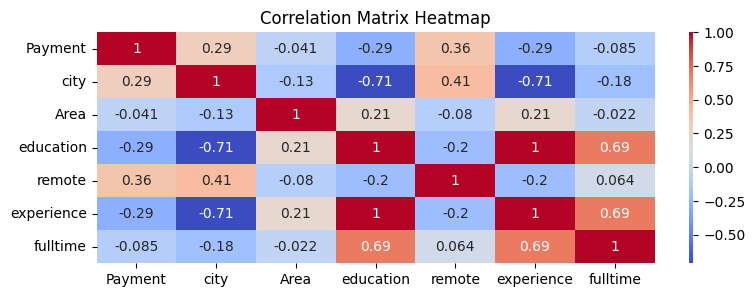

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

col =["Payment", "city","Area", "education", "remote","experience","fulltime"]
# Convert the correlation matrix to a Pandas DataFrame
correlation_df = pd.DataFrame(correlation_matrix, columns=col, index=col)

# Create the heatmap using Seaborn
plt.figure(figsize=(9, 3))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar_kws={"aspect": 60})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils

assembler = VectorAssembler(inputCols=[ "city","Area", "education", "remote","experience","fulltime"], outputCol="features")

data = assembler.transform(data1)

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")
model = logistic_regression.fit(train_data)

In [ ]:
model = DecisionTree.trainClassifier(
    train_data,  categoricalFeaturesInfo={},
    impurity='gini', maxDepth=5, maxBins=32)

In [ ]:
predictions = model.predict(train_data.map(lambda x: x.features))
labelsAndPredictions = train_data.map(lambda lp: lp.label).zip(predictions)

In [29]:
Result_data=pd.read_csv('drive/My Drive/x_test.csv')
Result_data.drop(columns='Unnamed: 0', inplace=True)


,city,Area,education,remote,experience,fulltime,label,Target,labelTree
0,3,1,1,2,1,1,5,3,5
1,3,1,1,1,1,2,2,2,2
2,2,3,2,2,2,2,3,5,3
3,1,1,2,2,2,1,2,1,2
4,2,2,2,2,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...
924,1,3,2,1,2,1,1,1,1
925,2,2,2,2,2,2,3,5,3
926,2,2,1,2,1,1,5,3,5
927,3,1,1,1,1,2,2,2,2


In [60]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(test_data, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [85]:
roc_auc_dict = roc_auc_score_multiclass(Result_data['Target'], Result_data['label'])
roc_auc_dict

{1: np.float64(0.7216474937239649),
 2: np.float64(0.5705899067969993),
 3: np.float64(0.5548136907772719),
 4: np.float64(0.5),
 5: np.float64(0.5935057552934488)}

In [84]:
roc_auc_dict = roc_auc_score_multiclass(Result_data['Target'], Result_data['labelTree'])
roc_auc_dict

{1: np.float64(0.3417818422577174),
 2: np.float64(0.3958342805182996),
 3: np.float64(0.5058843365368403),
 4: np.float64(0.5788262370540851),
 5: np.float64(0.5935057552934488)}

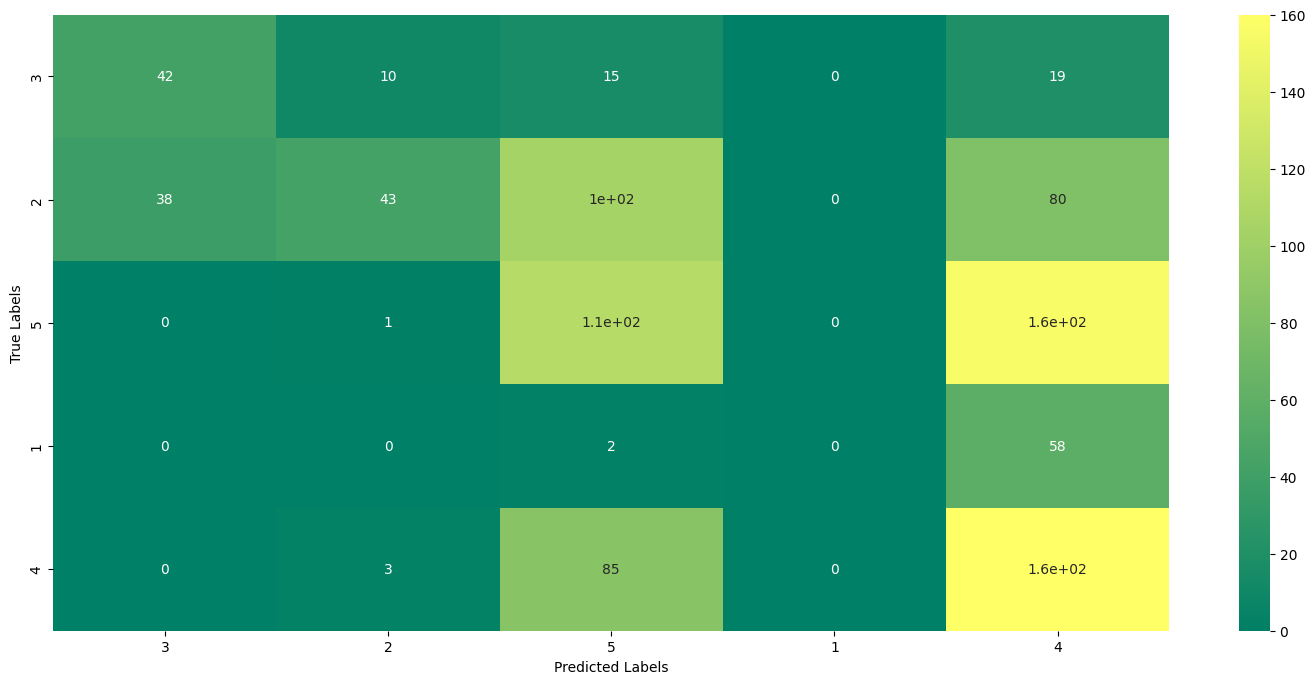

In [39]:
import seaborn as sns
from sklearn import metrics

plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(Result_data['Target'],Result_data['label']), annot = True, xticklabels = Result_data['Target'].unique(), yticklabels = Result_data['Target'].unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

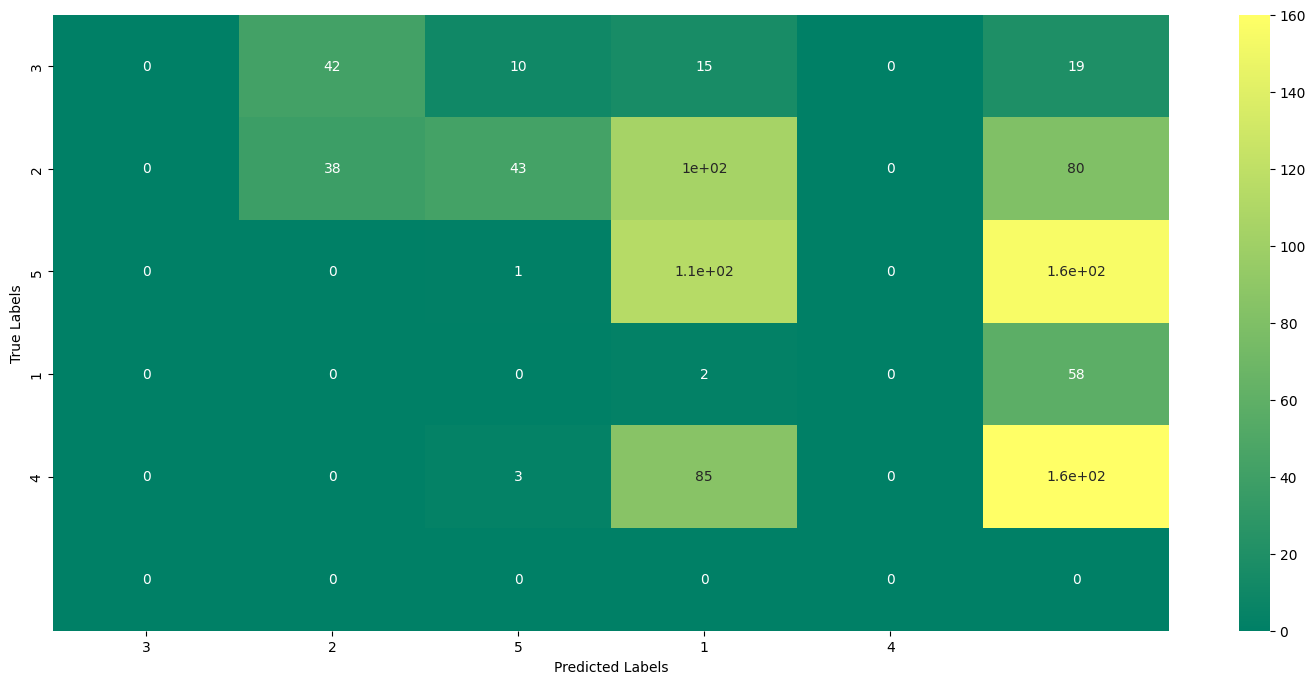

In [86]:
import seaborn as sns
from sklearn import metrics

plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(Result_data['Target'],Result_data['labelTree']), annot = True, xticklabels = Result_data['Target'].unique(), yticklabels = Result_data['Target'].unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        #creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict